In [1]:
import AoC_helper
import os, sys
import numpy as np
import math
#import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import copy
import csv #for load from file
import pandas as pd


In [7]:
df =pd.read_csv('input9.txt',header=None)
valuelist = df.values #full
print(len(valuelist))
print(len(valuelist[0][0]))

valuelist2= [['2199943210'],['3987894921'],['9856789892'],['8767896789'],['9899965678']]


s1 = 5
s2 = 10

s1 = 100
s2 = 100

puzzle_input = valuelist

100
100


In [30]:
import numpy as np

#numlist = np.zeros([100*100,1])

index =-1

grid=np.zeros([s1,s2])

for x in range(s1):
    for y in range(s2):
        grid[x][y]=int(puzzle_input[x][0][y])
#print(grid)
#print(np.max(np.max(grid)))
biggergrid = np.ones([s1+2,s2+2])*999
biggergrid[1:s1+1,1:s2+1]=grid
biggergrid[biggergrid==9]=999

answer = []
print(biggergrid)
count = 0
for x in np.arange(1,s1+1):
    for y in np.arange(1,s2+1):
        left=biggergrid[x-1][y]
        right=biggergrid[x+1][y]
        bottom=biggergrid[x][y+1]
        top=biggergrid[x][y-1]
        mid =biggergrid[x][y]
        if (mid<left) and (mid<right) and (mid< top) and (mid<bottom)and (mid<left):
            answer.append((x,y,mid))
            count+= mid+1
                       
print(count)
print(answer)

[[999. 999. 999. ... 999. 999. 999.]
 [999. 999.   8. ...   2.   3. 999.]
 [999. 999. 999. ...   1.   0. 999.]
 ...
 [999.   8. 999. ... 999.   5. 999.]
 [999. 999.   2. ...   8. 999. 999.]
 [999. 999. 999. ... 999. 999. 999.]]
633.0
[(1, 7, 1.0), (1, 11, 1.0), (1, 21, 0.0), (1, 30, 0.0), (1, 46, 0.0), (1, 56, 2.0), (1, 81, 0.0), (1, 94, 0.0), (2, 41, 1.0), (2, 100, 0.0), (3, 17, 2.0), (3, 61, 3.0), (3, 67, 0.0), (3, 86, 1.0), (4, 1, 5.0), (5, 10, 3.0), (6, 34, 3.0), (6, 77, 0.0), (7, 50, 0.0), (7, 87, 5.0), (7, 91, 0.0), (8, 22, 0.0), (8, 99, 1.0), (9, 1, 4.0), (9, 13, 0.0), (9, 38, 3.0), (10, 18, 2.0), (10, 26, 4.0), (10, 66, 0.0), (10, 83, 0.0), (11, 57, 2.0), (11, 62, 1.0), (11, 90, 2.0), (12, 7, 1.0), (12, 13, 4.0), (12, 34, 3.0), (12, 44, 1.0), (13, 74, 0.0), (15, 1, 4.0), (15, 31, 0.0), (15, 55, 5.0), (16, 39, 1.0), (16, 78, 0.0), (16, 91, 1.0), (16, 97, 0.0), (17, 50, 2.0), (17, 58, 4.0), (17, 64, 0.0), (19, 5, 0.0), (20, 14, 0.0), (20, 24, 0.0), (20, 81, 0.0), (21, 1, 1.0), (2

In [54]:
#7b
bassinnr = biggergrid
bassinnr[bassinnr<999]=998
prevgrid =biggergrid
free_digit =997
for iteration in range(500):

    print(iteration)
    for x in np.arange(1,s1+1):
        for y in np.arange(1,s2+1):
            left=bassinnr[x-1][y]
            righttop=bassinnr[x+1][y+1]
            right=bassinnr[x+1][y]
            bottom=bassinnr[x][y+1]
            top=bassinnr[x][y-1]
            mid =bassinnr[x][y] 
            if (mid < 999):
                if (right < 999) and (top <999):
                    bassin_name = min(left,right,top,bottom,mid,righttop)
                else:
                    bassin_name= min(left,right,top,bottom,mid)                    
                if bassin_name ==998: # new bassin
                    bassin_name = free_digit
                    free_digit=free_digit-1
                
                if not(mid==999):
                    bassinnr[x][y] = bassin_name
    prevgrid = bassinnr

print(bassinnr)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
print('n bassins:',free_digit)
sizes = []
for i in np.arange(free_digit,999):
    sizes.append(np.sum(bassinnr==int(i)))
sorted=np.sort(sizes)
print(sorted[::-1],sorted[-1]*sorted[-2]*sorted[-3])

n bassins: 69
[104 102  99  97  96  92  92  86  86  79  78  77  75  74  74  73  72  71
  71  69  68  66  65  64  64  63  63  62  62  60  60  59  59  58  57  57
  55  53  53  52  51  50  49  49  47  47  47  47  47  47  46  46  46  46
  45  45  45  45  43  43  43  42  41  41  41  40  38  38  38  37  37  37
  36  36  36  36  36  36  35  35  35  34  34  34  34  33  32  32  32  32
  32  31  31  31  31  31  31  31  30  30  30  29  29  29  29  28  28  28
  28  28  28  28  28  27  27  27  27  27  26  25  25  25  24  24  23  23
  23  23  23  22  22  22  21  20  20  19  19  19  19  19  18  18  18  17
  17  17  17  17  17  16  16  16  15  15  15  15  15  14  14  14  14  14
  14  14  14  14  13  13  13  12  12  12  12  12  12  11  11  11  11  11
  11  11  11  11  11  11  11  11  11  10  10  10  10  10  10   9   9   9
   9   9   9   8   8   7   7   7   7   7   7   6   6   6   6   6   6   6
   5   5   5   5   5   4   4   4   4   4   4   4   4   4   4   3   3   3
   3   3   3   3   3   3   3   2   2 

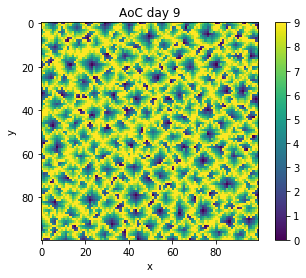

In [73]:
plt.subplot(1,1,1)
plt.imshow( grid , cmap = 'viridis' , interpolation = 'nearest' )  
plt.title( "AoC day 9" )
plt.xlabel( "x" )
plt.ylabel( "y" )
#todo: make more general, with custom labels:
#see https://moonbooks.org/Articles/How-to-change-imshow-axis-values-labels-in-matplotlib-/
plt.colorbar()
#plt.show()
plt.savefig('day7.jpg',dpi=90)

In [40]:
print('day 7 b')
def iter(count, currsum):
    if count == 0:
        return count, currsum
    else:
        return iter(count-1, currsum+count)

def iter_formula(count):
    return (abs(count)-0)*(abs(count)+1)/2

print(iter(15,4))


count =0

for iteration in range(800):
    fuel = 0
    for i in valuelist:
        fuel += iter_formula(iteration-i)
    #print(iteration, fuel)
    if fuel < minfuel:
        minfuel = fuel
        minit  = iteration
print(minit, minfuel)

day 7 b
(0, 124)


TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [ ]:
print(iter_formula(0))
print(iter_formula(1))
print(iter_formula(-1))
print(iter_formula(2))
print(iter_formula(11))

In [ ]:
print(np.median(valuelist))